<a href="https://colab.research.google.com/github/analytistic/machine-learning/blob/main/Day_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: Machine Learning Basics and Classification
We will use Numpy for many matrix and array operations. Its user guide is available [here](https://numpy.org/doc/stable/user/basics.html).

In [15]:
# Import some libraries required later.
import numpy as np

# Set notebook to display matplotlib as an image. In Python it would usually be
# a popup window, which does not work in a notebook.
%matplotlib inline
import matplotlib.pyplot as plt

## Loading MNIST

We first need a dataset. We will use the MNIST Digits dataset for this lab. We can load the dataset using [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) from [`scikit-learn`](https://scikit-learn.org/stable/user_guide.html).

Let's load the dataset into `digits`:

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

Now to see some data about the dataset:

In [17]:
print('Data type:', type(digits))
print('Description:', digits['DESCR'])
print('Dataset shape (data):', digits.data.shape)
print('Dataset shape (targets):', digits.target.shape)
print(f'Data range: min {np.min(digits.data)}, max {np.max(digits.data)}')
print(f'Target range: min {np.min(digits.target)}, max {np.max(digits.target)}')
print('First sample is of type', type(digits.data[0]))

Data type: <class 'sklearn.utils._bunch.Bunch'>
Description: .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping bloc

**Question 1:** How many samples are in the dataset?

**Question 2:** What does the dataset contain?

Let's take a look at some of the data.

In [18]:
print('Sample 1:', digits.data[0])
print('Sample 1 shape:', digits.data[0].shape)
print('Sample 1 belongs to class', digits.target[0])

Sample 1: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Sample 1 shape: (64,)
Sample 1 belongs to class 0


**Question 3:** What does a shape of `(64,)` mean?

And to visualise this sample:

In [19]:
print(digits.target[0])

0


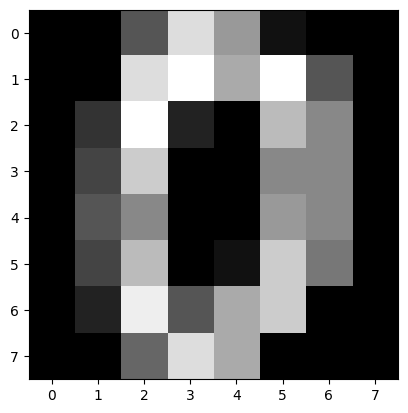

In [20]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

**Question 4:** What did calling `.reshape(8,8)` on the sample do?

**Question 5:** Why is the minimum of `digits.target` 0 and the maximum 9?

Now split the dataset into 80% training and 20% testing sets using the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) utility function. This function also shuffles the dataset...

It is important to shuffle your dataset if it has been sorted. If you don't, your training-testing split won't accurately represent the dataset's true distribution. For example, if the samples were in order from 0 to 9, your training set (first 80%) may not include any examples of the digit 9.

In [21]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target

# test_size is the proportion of the dataset to be returned in the testing set.
# random_state forces the shuffling to be the same across runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print('Training dataset samples:', X_train.shape)
print('Training dataset targets:', y_train.shape)
print('Testing dataset samples:', X_test.shape)
print('Testing dataset targets:', y_test.shape)

Training dataset samples: (1437, 64)
Training dataset targets: (1437,)
Testing dataset samples: (360, 64)
Testing dataset targets: (360,)


## kNN classifier


Let's simplify the problem for now and only try to identify one digit—for example, the number 5. This '5-detector' will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create the target vectors for this classification task.

In [22]:
# Create arrays of boolean values where the corresponding element in
# y_train/y_test equals 5.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

 Now let's create and train the classifier:

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train_5)

KNeighborsClassifier(n_neighbors=4, weights='distance')

And now test it with some inputs:

[False]
[False]
[False]
[False]
[False]
[False]
[ True]
[False]
[ True]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[ True]


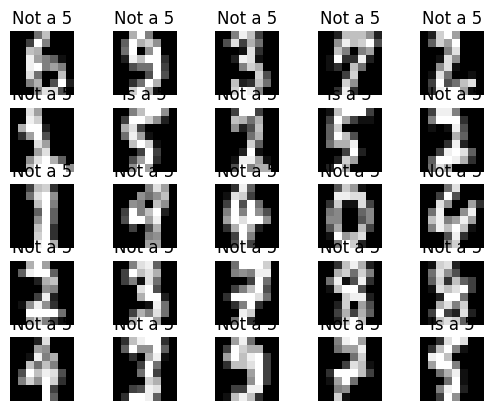

In [56]:
rows, cols = 5, 5
fig, ax = plt.subplots(rows, cols)
num_samples = min(rows * cols, len(X_test))
ax = ax.flatten()
#print(num_samples)
for num in range(num_samples):
    sample = X_test[num]
    ax[num].imshow(sample.reshape(8, 8), cmap='gray')
    prediction = knn_clf.predict([sample])
    print(prediction)
    ax[num].set_title('Is a 5' if prediction else 'Not a 5')
    ax[num].set_axis_off()


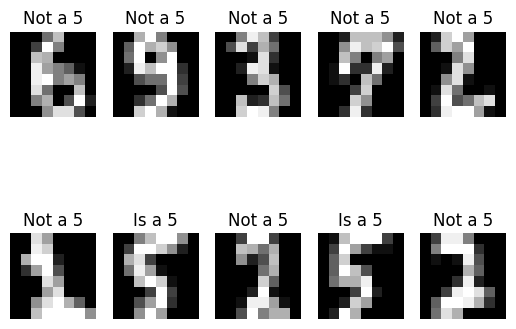

In [50]:
rows, cols = 2, 5
fig, ax = plt.subplots(rows, cols)
ax = ax.flatten()
for num, sample in enumerate(X_test[:rows*cols]):
    ax[num].imshow(sample.reshape(8, 8), cmap='gray')
    ax[num].set_title('Is a 5' if knn_clf.predict([sample]) else 'Not a 5')
    ax[num].set_axis_off()

plt.show()

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance measures available...

A good way to evaluate a model is to use cross-validation. Let's use the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score) function to evaluate your kNN model using k-fold cross-validation, with three folds (k=3). Remember that k-fold cross-validation means splitting the training set into k-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

### Measuring Accuracy Using Cross-Validation

In [60]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(knn_clf, X_train, y_train_5, cv=4, scoring='accuracy'))

[1.         0.99442897 1.         1.        ]


### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict) function. Just like the `cross_val_score` function, `cross_val_predict` performs k-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set ('clean' meaning that the prediction is made by a model that never saw the data during training).

Now you are ready to get the confusion matrix using the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix) function. Just pass it the target classes (`y_train_5`) and the predicted classes (`y_train_pred`):

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train_5, cv=3)
print(len(y_train_pred))
print(confusion_matrix(y_train_5, y_train_pred))

1437
[[1301    1]
 [   4  131]]


Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 1,301 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1 was wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 4 were wrongly classified as non-5s (false negatives), while the remaining 131 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right).

### Precision and Recall

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier:

\begin{equation}
precision = \frac{TP}{TP+FP}
\end{equation}

TP is the number of true positives, and FP is the number of false positives.

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier:

\begin{equation}
recall = \frac{TP}{TP+FN}
\end{equation}

FN is of course the number of false negatives.

We can use [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision%20score#sklearn.metrics.precision_score) and [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall%20score#sklearn.metrics.recall_score) from scikit-learn.

In [61]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

0.9924242424242424


In [62]:
# Your code here: compute the recall_score

print(recall_score(y_train_5, y_train_pred))

0.9703703703703703


It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.







\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision+recall}
\end{equation}



In [63]:
from sklearn.metrics import f1_score
# Your code here: compute the f1_score
print(f1_score(y_train_5, y_train_pred))

0.9812734082397003


The F1 score favours classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall. For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

### ROC curves

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the roc_curve() function:

In [64]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [65]:
from sklearn.model_selection import cross_val_predict
y_probas_knn = cross_val_predict(knn_clf, X_train, y_train_5, cv=3,
                                 method='predict_proba')

In [66]:
from sklearn.metrics import roc_curve
y_scores_knn = y_probas_knn[:, 1]  # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_5, y_scores_knn)

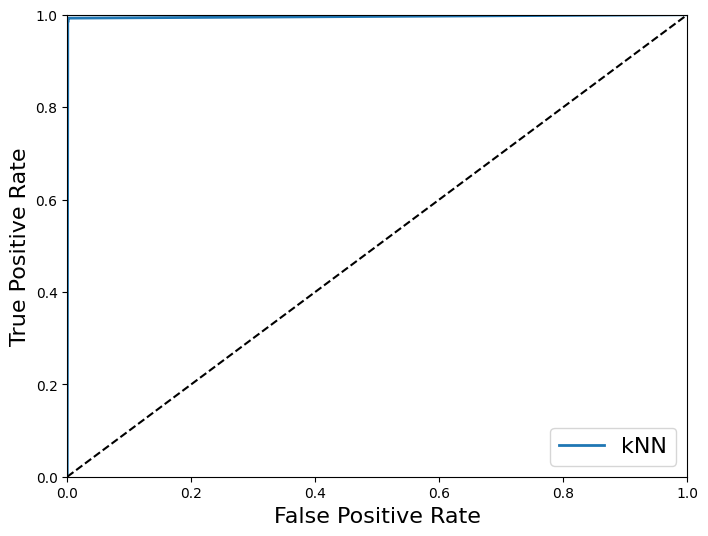

In [67]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_knn, tpr_knn, 'kNN')
plt.legend(loc='lower right', fontsize=16)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_knn)

0.995858223815213

## Multiclass classification

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [70]:
y_knn_pred = knn_clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_knn_pred))

0.9833333333333333


In [80]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)


[[145   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0]
 [  0   1 142   0   0   0   0   1   0   0]
 [  0   0   0 147   0   0   0   2   0   0]
 [  0   0   0   0 134   0   0   1   0   0]
 [  0   0   0   0   0 132   0   0   0   3]
 [  0   1   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 145   0   0]
 [  0   4   0   0   0   0   0   0 140   0]
 [  0   1   0   3   0   1   0   0   1 134]]


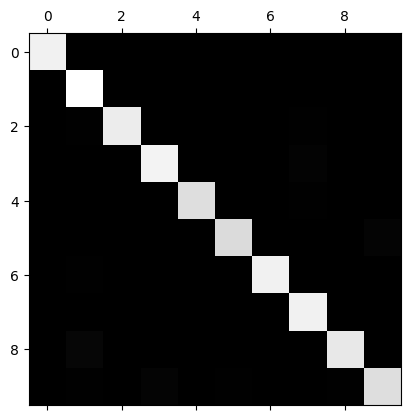

In [73]:
plt.matshow(conf_mx, cmap='gray')
plt.show()

## Exercises

**Task 1:** Try to use the different *folds* of k-fold cross-validation to evaluate your kNN model.

In [94]:
# change the "cv" parameter in the cross_val_predict function
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(recall_score(y_train, y_train_pred, average='weighted'))
print(precision_score(y_train, y_train_pred, average='weighted'))
print(f1_score(y_train, y_train_pred, average='weighted'))

[[145   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0]
 [  0   0 143   0   0   0   0   1   0   0]
 [  0   0   0 147   0   0   0   2   0   0]
 [  0   0   0   0 134   0   0   1   0   0]
 [  0   0   0   0   0 133   0   0   0   2]
 [  0   0   0   0   0   0 146   0   0   0]
 [  0   0   0   0   0   0   0 145   0   0]
 [  0   4   0   0   0   0   0   0 140   0]
 [  0   1   0   3   0   1   0   0   2 133]]
0.988169798190675
0.988291516687552
0.9881444216306818


**Task 2:** Try to use the different *n_neighbors* of kNN for the MNIST dataset.

Then evaluate them (try  Confusion Matrix,  Precision,  Recall and ROC Curves). You can try to plot multiple ROC Curves into one figure (Hints: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).



In [107]:
# change 'n_neighbors' in KNeighborsClassifier

knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=2)
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(recall_score(y_train, y_train_pred, average='weighted'))
print(precision_score(y_train, y_train_pred, average='weighted'))
print(f1_score(y_train, y_train_pred, average='weighted'))

[[145   0   0   0   0   0   0   0   0   0]
 [  0 154   0   0   0   0   0   0   0   0]
 [  0   0 143   1   0   0   0   0   0   0]
 [  0   0   0 147   0   0   0   1   1   0]
 [  0   0   0   0 134   0   0   1   0   0]
 [  0   0   0   0   0 133   0   0   0   2]
 [  0   1   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 145   0   0]
 [  0   4   0   0   0   0   0   0 140   0]
 [  0   1   0   3   0   2   0   0   3 131]]
0.9860821155184412
0.9862212441606886
0.986038851360759


**Task 3:** A more challenging exercise: Try to choose optimal value of *n_neighbors* of KNN with the help of cross validation.

precison: [0.9883807348481468, 0.9883807348481468, 0.9875710380970609, 0.988291516687552, 0.986912047152595, 0.9861918069334716, 0.9814245960960549, 0.9834762120772018, 0.9814858357829299, 0.9848425769826212, 0.9799897266411269, 0.9786038015760348, 0.9806492263389119, 0.9792366134269486]
recalls: [0.988169798190675, 0.988169798190675, 0.9874739039665971, 0.988169798190675, 0.9867780097425192, 0.9860821155184412, 0.9812108559498957, 0.9832985386221295, 0.9812108559498957, 0.9846903270702854, 0.9798190675017397, 0.9784272790535838, 0.9805149617258176, 0.9791231732776617]
f1: [0.9881429455532054, 0.9881429455532054, 0.9874483823280749, 0.9881444216306818, 0.9867424512137598, 0.9860531329335246, 0.9811647666532632, 0.9832651621021008, 0.9811741809557553, 0.9846648609974128, 0.9797872159000707, 0.9783883930538153, 0.980476515233476, 0.9790722790405726]


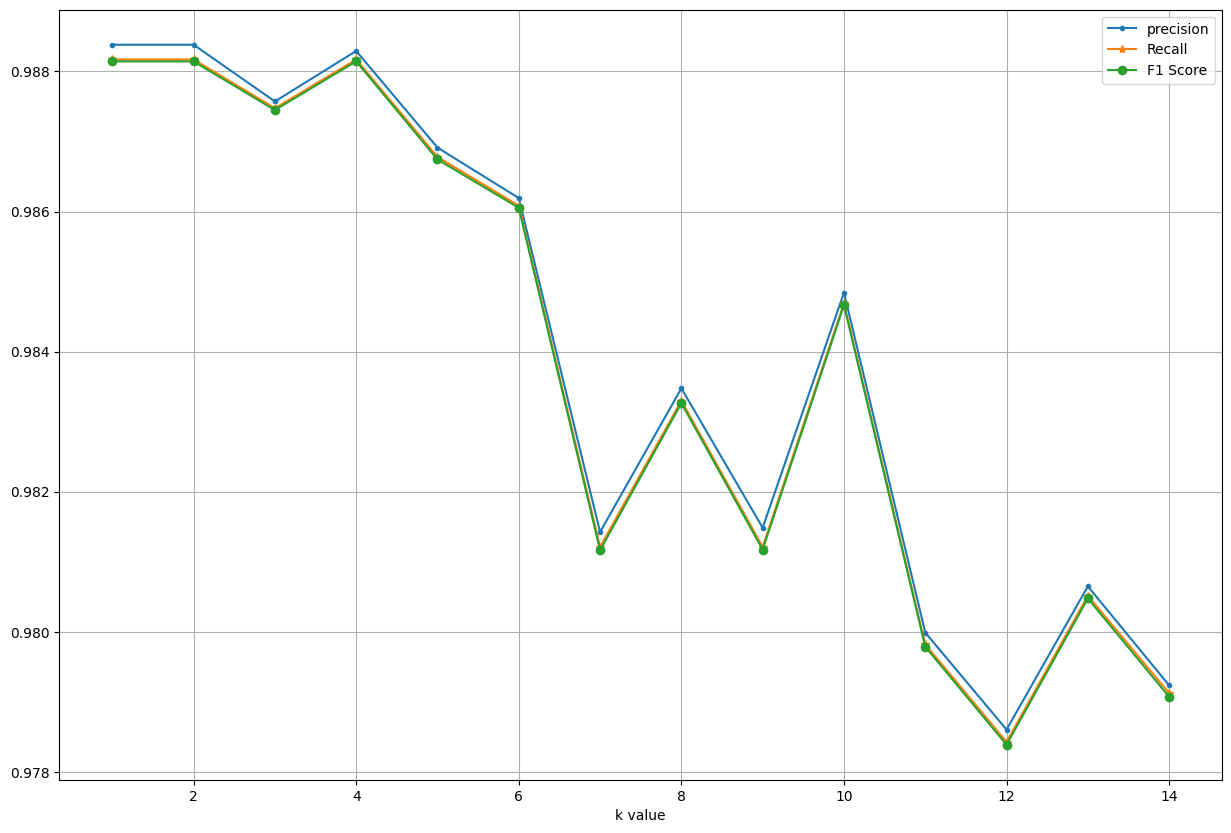

In [121]:
# choose optimal value of n_neighbors of KNN with the help of cross validation
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, f1_score
%matplotlib inline
import matplotlib.pyplot as plt

# 载数据集
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# 初始结果列表
recalls_list = []
precision_list = []
f1_list = []



# 遍历k值
k_values = range(1, 15)
for k in k_values:
  # 训练模型,cv为10
  knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k)
  y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=10)
  # print(conf_mx = confusion_matrix(y_train, y_train_pred))

  # 计算精确率，召回率，f1
  recall = recall_score(y_train, y_train_pred, average='weighted')  # 使用加权平均
  precision = precision_score(y_train, y_train_pred, average='weighted') # 使用加权平均
  f1 = f1_score(y_train, y_train_pred, average='weighted')  # 使用加权平均

  #结果添加到列表中
  recalls_list.append(recall)
  precision_list.append(precision)
  f1_list.append(f1)


print('precison:', precision_list)
print('recalls:', recalls_list)
print('f1:', f1_list)

# 绘制图表
plt.figure(figsize=(15, 10))
plt.plot(k_values, precision_list, marker='.', label='precision')
plt.plot(k_values, recalls_list, marker='*', label='Recall')
plt.plot(k_values, f1_list, marker='o', label='F1 Score')
plt.xlabel('k value')
plt.grid(True)
plt.legend()
plt.show()

